Summe Grauwerte: 6096 Subpixelposition Markenzentrum (r/c): 3.912 3.500


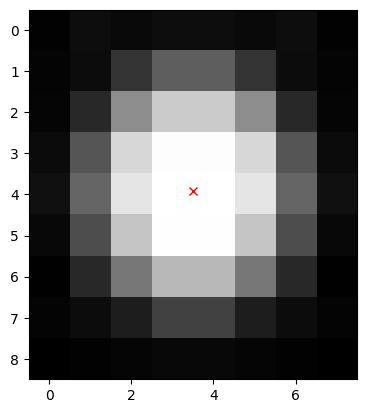

In [38]:
import matplotlib.pyplot as plt
from skimage import io

'''Eingabe'''
# Einlesen des digitalen Bildes als Graustufenbild (mode="L")
# Beispielbild: Zentrum einer Messmarke (weiß) auf schwarzem Grund
img = io.imread('https://datashare.tu-dresden.de/s/SRwbYTa4iHtr4JD/preview', mode="L")

# Schwellwert (nur Grauwerte über Schwellwert berücksichtigen, hier willkürlich auf GW = 10 gesetzt)
threshold = 10

'''Initialisieren von (Hilfs-)parametern'''
# Gesamtanzahl Zeilen, Spalten auslesen
rows,cols = img.shape

# Parameter für aufsummierte Grauwerte initialisieren
sum_gw = 0

# Parameter für Subpixelposition, getrennt nach Zeilen und Spalten, initialisieren
r_sub = 0
c_sub = 0

'''Anwenden des Schwerpunktoperators'''
# Über Messmarkenbild zeilenweise iterieren, von jeweiliger Koordinatenposition (i,j) Grauwert abgreifen und auf Schwellwertüberschreitung prüfen,
# mit Position multiplizieren und aufsummieren
for r in range(rows):
    for c in range(cols):
        # Grauwert an Pixelkoordinate [r,c] abgreifen
        gw = img[r,c]

        # Prüfung ob Grauwert das Schwellwertkriterium erfüllt
        # ja? fahre fort!
        # nein? stoppe hier und gehe zum nächsten Grauwert
        if gw > 10:

          # Grauwerte für arithmetisches Mittel aufsummieren
          # abgegriffenen Grauwert mit Bildzeilennummer bzw. Bildspaltennummer multiplizieren und aufsummieren
          sum_gw += gw
          r_sub = r_sub + gw*(r)
          c_sub = c_sub + gw*(c)

# bilde das arithmetische Mittel um die Subpixelposition (r_sub, c_sub) final zu berechnen
r_sub = r_sub / sum_gw
c_sub = c_sub / sum_gw

''' Ausgabe '''
print("Summe Grauwerte:", sum_gw, "Subpixelposition Markenzentrum (r/c):", "%.3f" % r_sub, "%.3f" % c_sub)

# Zeige Bild von Messmarke an und zeichne berechnete Subpixelposition von Markenzentrum ein
fig, ax = plt.subplots()
plt.plot(c_sub, r_sub, marker='x', color="red")
plt.imshow(img, cmap='gray')


# Neuer Abschnitt